# Discussion 5:

## 1. Unsupervised Learning



So far, we have only been working with Supervised datasets, where we know the thing that we want to predict. We either were creating a prediction model on known features, or we have labels in the dataset that we are predicting.

But, most real life datasets will not have properly marked data. Most data dumps will just contain data points, with no significant way to distinguish between them.

In situations like this, we have to use unsupervised learning techniques which can give us insight into the nature of the data, from the data itself.

Main Goals:

1. Pattern Discovery: Unsupervised learning algorithms search for patterns or intrinsic structures within the data.

2. Dimensionality Reduction: Simplifying the data without losing critical information, making it easier to analyze.

3. Clustering: Grouping data points into clusters based on similarity.

### Clustering

Clustering is the process of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups.

There are multiple ways of creating clusters. Some of the common ways of doing so are: 

#### K-means Clustering vs Hierarchical (Agglomerative) Clustering

K-means Clustering

How It Works:
1. Initialization: Start by randomly selecting 
k data points as the initial centroid
2. Assignment: Assign each data point to the nearest centroid, based on the Euclidean distance (or another distance measure) between the data point and the centroid. This forms 
k cluster
3. Update: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. Iterate: Repeat the assignment and update steps until the centroids no longer change significantly, indicating that the algorithm has converged.


Agglomerative Clustering:

How it works:

1. Initialization: Treat each data point as a single cluster. Thus, if there are 
n data points, you start wit
�
n clust
2. Find the Closest Pair: Calculate the distance between all pairs of clusters and identify the pair of clusters that are closest to each other.
3. Merge Clusters: Combine the two closest clusters into a single cluster.
4. Update Distance Matrix: Recalculate the distances between the new cluster and each of the old clusters.
5. Repeat: Continue merging the closest pair of clusters and updating the distance matrix until all the data points are clustered into a single group of 
k clusters, according to the desired number of clusters or until a certain distance threshold is met.ers.s.s.ithm:

C:\Users\premk\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


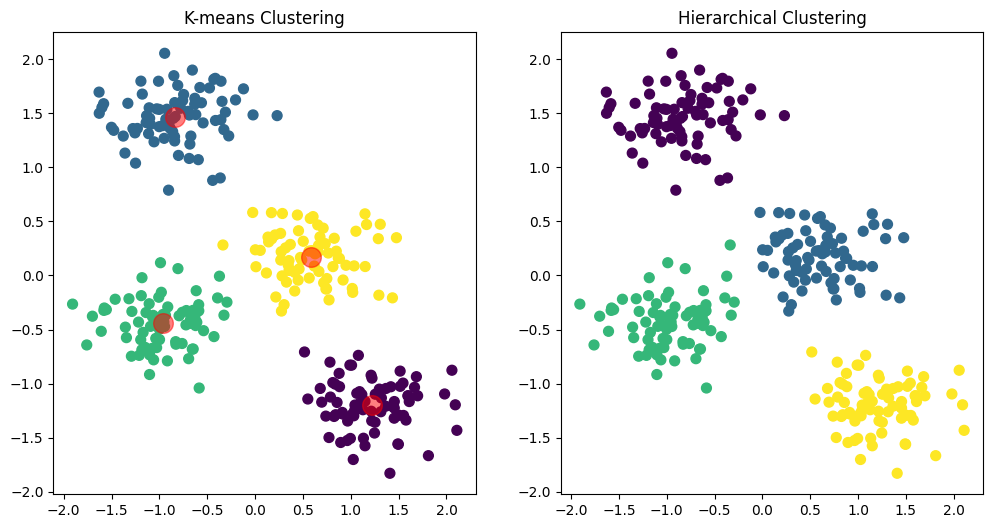

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Standardizing the data

# K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
y_hierarchical = hierarchical.fit_predict(X)

# Plotting the results of K-means clustering
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering')

# Plotting the results of Hierarchical clustering
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, s=50, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()


#### Differences between K-means and Agglomerative clustering:

1. Algorithmic Approach: K-means is a centroid-based algorithm that focuses on minimizing the variance within each cluster, whereas agglomerative clustering is a connectivity-based algorithm that builds clusters based on the distance between data points.
2. Number of Clusters: In K-means, the number of clusters needs to be specified beforehand. In agglomerative clustering, although you can specify the number of clusters, the algorithm naturally allows you to explore the cluster hierarchy and decide on the number of clusters by inspecting the dendrogram.
3. Scalability: K-means is generally faster and can handle larger datasets more efficiently than agglomerative clustering, which can be computationally expensive due to the complexity of calculating distances between clusters as they merge.
4. Cluster Shape: K-means tends to find spherical clusters, assuming that clusters are spatially grouped around a central point. Agglomerative clustering does not have this assumption and can find clusters of arbitrary shape.

### Dimensionality Reduction:

Dimensionality reduction is a critical step in data preprocessing, especially when dealing with high-dimensional data. It helps in reducing the number of random variables to consider, which can simplify the models, reduce the computational costs, and help in visualizing the data more effectively. Among the various techniques for dimensionality reduction, Principal Component Analysis (PCA) is one of the most widely used and straightforward methods.

### Principal Component Analysis (PCA)

PCA is a proceedure to convert a set of observations of possibly correlated variables into linearly uncorrelated variables called 'principal components'

The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components.

The resulting vectors (principal components) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

(200, 5)
(200, 2)


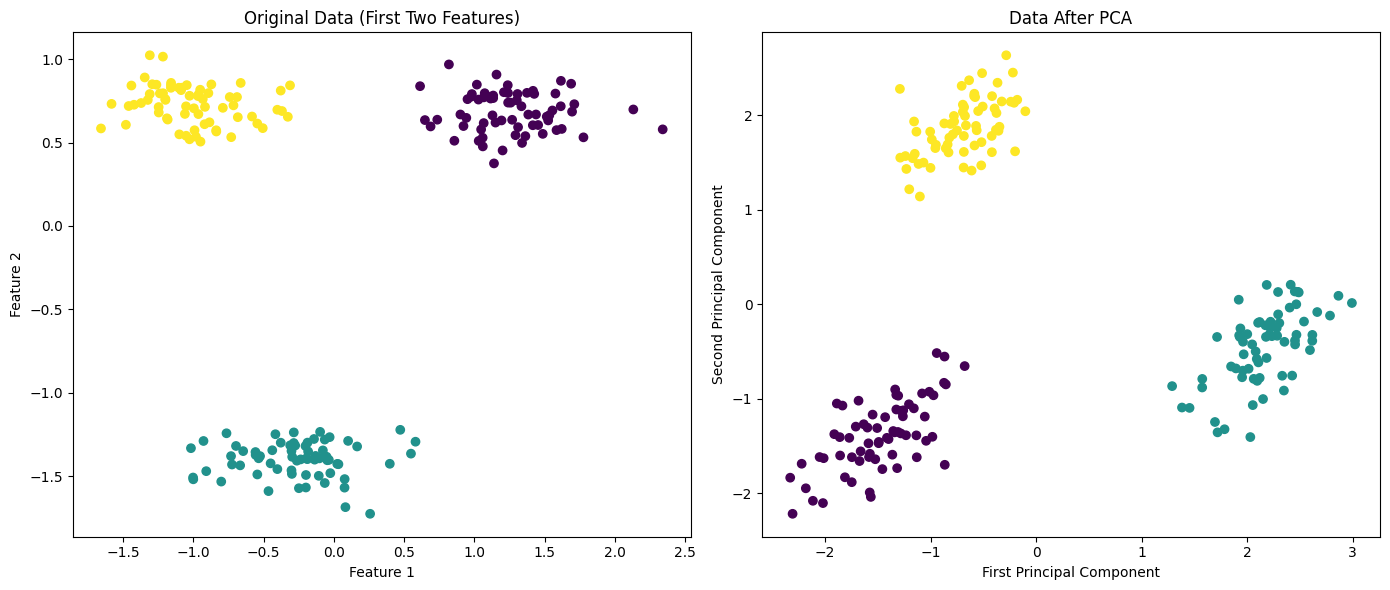

In [2]:
# look up t-SNE as well!!

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=3, n_features=5, random_state=42)

print(X.shape)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizing the original data (projected to the first two dimensions)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data (First Two Features)')

# Apply PCA
pca = PCA(n_components=2)  # Reduce data to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

# Plot the PCA-reduced data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data After PCA')

plt.tight_layout()
plt.show()


Before PCA: The plot of the original data shows how the data points are distributed based on the first two features. This visualization might not capture all the variances due to the limitation of only showing two dimensions out of the original five.

After PCA: The PCA-reduced plot illustrates the dataset in a new two-dimensional space defined by the first two principal components, which are linear combinations of the original five features. These principal components are chosen to maximize the variance, providing a more insightful view into the data's structure.

### Part 2: Deep Learning with Tensorflow/Keras

Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks, and it operates on top of TensorFlow, one of the most popular machine learning libraries. 

TensorFlow, developed by the Google Brain team, provides a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML, and developers easily build and deploy ML-powered applications.

#### Core concepts in Keras:

$\textbf{Models}$: The core data structure in Keras is a model, a way to organize layers. The most common type of model is the Sequential model, a linear stack of layers.

$\textbf{Layers}$:Layers are the basic building blocks of neural networks in Keras. A layer consists of a set of neurons, and each layer is connected to other layers.

$\textbf{Compilation}$:After defining a model, you must compile it by specifying the loss function and the optimizer. Keras also allows you to specify a list of metrics for the model to evaluate during training and testing.

#### Working Example

$\textbf{Step 0}$: Install Tensorflow on your device using:
`pip install tensorflow`
in Terminal/Command prompt

$\textbf{Step 1}$: Load the MNIST Dataset: 

TensorFlow provides easy access to several datasets including MNIST. The dataset is automatically split into train and test sets.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


ModuleNotFoundError: No module named 'tensorflow'

$\textbf{Step 2}$: Define the model:

We'll define a simple Sequential model with one input layer, one hidden layer, and one output layer.

In [16]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


$\textbf{Step 3}$: Compile the Model

In [17]:
model.compile(
  optimizer=SGD(learning_rate=0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

$\textbf{Step 4}$: Prepare the Labels

We need to encode the labels as one-hot vectors (a representation where all elements of the array are zero except one, which is marked as 1).

In [18]:
print('Before: ', train_labels[0])

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print('After: ', train_labels[0])

Before:  5
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


$\textbf{Step 5}$: Train the Model

In [19]:
model.fit(
  train_images,
  train_labels,
  epochs=5,
  batch_size=32, validation_split=0.2
)

Epoch 1/5


1500/1500 [==============================] - 4s 2ms/step - loss: 0.7812 - accuracy: 0.7837 - val_loss: 0.3686 - val_accuracy: 0.8938
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8967 - val_loss: 0.2999 - val_accuracy: 0.9162
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3000 - accuracy: 0.9123 - val_loss: 0.2660 - val_accuracy: 0.9237
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9210 - val_loss: 0.2395 - val_accuracy: 0.9324
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9293 - val_loss: 0.2295 - val_accuracy: 0.9330


$\textbf{Step 6}$: Evaluate the Model

In [21]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: {loss}, accuracy of model: {accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.9304
Loss: 0.23573195934295654, accuracy of model: 0.930400013923645


This is how a Keras Model works. With this as a skeleton, the possibilities for the models you can build are endless!

